## 데이터 로드

In [11]:
import pandas as pd

train = pd.read_csv(',/data/train.csv')
test = pd.read_csv('./data/test.csv')

In [13]:
train.shape[0]

76888

In [14]:
test.shape[0]

74121

## 글자수 분포

In [18]:
# 글자수 컬럼 생성

train['len'] = train['label'].str.len()
train

,id,img_path,label,len
0,TRAIN_00000,./train/TRAIN_00000.png,빨간색,3
1,TRAIN_00001,./train/TRAIN_00001.png,머,1
2,TRAIN_00002,./train/TRAIN_00002.png,차차,2
3,TRAIN_00003,./train/TRAIN_00003.png,써,1
4,TRAIN_00004,./train/TRAIN_00004.png,놓치다,3
...,...,...,...,...
76883,TRAIN_76883,./train/TRAIN_76883.png,회,1
76884,TRAIN_76884,./train/TRAIN_76884.png,겪다,2
76885,TRAIN_76885,./train/TRAIN_76885.png,벨트,2
76886,TRAIN_76886,./train/TRAIN_76886.png,톼,1


In [19]:
train_len_count = pd.DataFrame(train['len'].value_counts())
train_len_count = train_len_count.reset_index()
train_len_count.columns = ['len', 'len_count']

display(train_len_count)

,len,len_count
0,2,28631
1,1,23703
2,3,13514
3,4,9988
4,5,1026
5,6,26


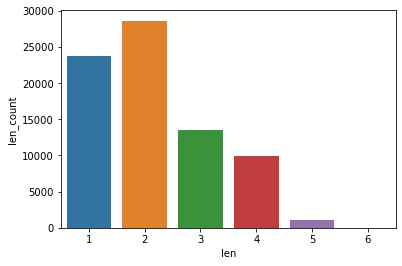

In [22]:
# 개수별 분포도

import seaborn as sns

sns.barplot(data=train_len_count, x='len', y='len_count');

In [36]:
import random
import pandas as pd
import numpy as np
import os

from PIL import Image
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic') 
import seaborn as sns

import cv2 as cv

from tqdm.auto import tqdm

import warnings
warnings.filterwarnings(action='ignore') 

In [34]:
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

from torchvision.models import resnet18
from torchvision import transforms

from tqdm.auto import tqdm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [27]:
def show_image(Image, Picture_Name):
    plt.imshow(Image)
    plt.title(Picture_Name)
    plt.show()
    
def sample_df_by_len(df, n_sample, n_len, use_frac=False):
  cond = (df['len']==n_len)
  df = df.loc[cond]
  if use_frac == True:
    df = df.sample(frac=n_sample)
  else:
    df = df.sample(n=n_sample)
  return df

def show_sample_image(df, n_sample, n_len):
  df = sample_df_by_len(df, n_sample, n_len)
  for img, label in zip(df['img_path'], df['label']):
    img = cv.imread(img)
    show_image(img, label)

## 1글자 데이터

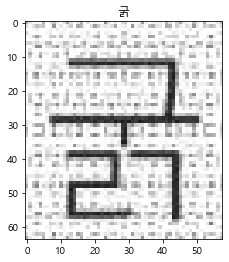

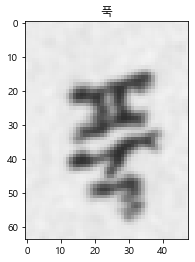

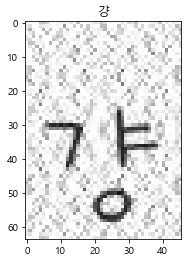

In [42]:
show_sample_image(df=train, n_sample=3, n_len=1)

## 2글자 데이터

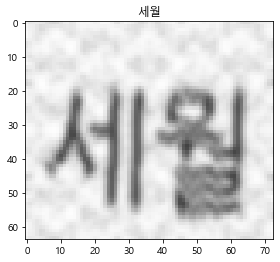

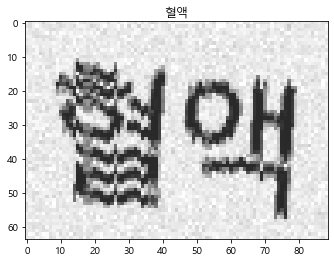

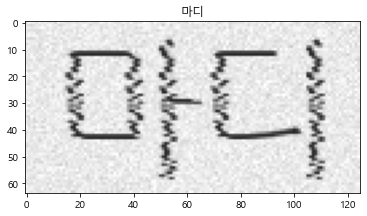

In [44]:
show_sample_image(df=train, n_sample=3, n_len=2)

## 3글자 데이터

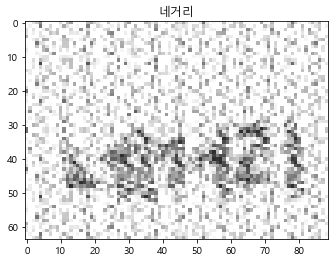

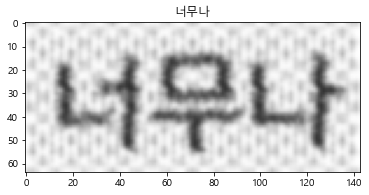

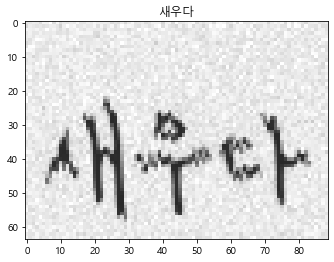

In [46]:
show_sample_image(df=train, n_sample=3, n_len=3)

# DTRB 데이터셋 형식으로 변환

In [52]:
!git clone https://github.com/DaveLogs/TRDG2DTRB.git

Cloning into 'TRDG2DTRB'...


TRDG2DTRB 의 convert.py 파일을 실행시켜 데이터셋을 변환할 건데, convert.py 파일은 데이터가

새우다_00001.png, 안녕_00002.png 처럼 되어있는 것을 가정하므로 파일명을 label_index.png 형식으로 변환

In [11]:
from tqdm import tqdm

for i in tqdm(range(train.shape[0])):
    os.rename(train['img_path'][i], './train/' + train['label'][i] + train['img_path'][i][-10:])

100%|██████████████████████████████████████████████████████████████████████████| 76888/76888 [00:04<00:00, 15657.60it/s]


In [13]:
os.listdir('./train')

['머_00001.png',
 '차차_00002.png',
 '써_00003.png',
 '놓치다_00004.png',
 '유월_00006.png',
 '빈_00007.png',
 '손뼉_00008.png',
 '숫자_00009.png',
 '윷_00010.png',
 '동아리_00011.png',
 '썰다_00012.png',
 '인정되다_00013.png',
 '슬쩍_00014.png',
 '신설_00015.png',
 '과자_00016.png',
 '입맛_00017.png',
 '휴지통_00018.png',
 '나오다_00019.png',
 '선언하다_00020.png',
 '온통_00021.png',
 '앞뒤_00022.png',
 '멈추다_00023.png',
 '비롯하다_00024.png',
 '셋째_00025.png',
 '이빨_00026.png',
 '훵_00027.png',
 '치약_00028.png',
 '가하다_00029.png',
 '부서_00030.png',
 '시인_00031.png',
 '걱정스럽다_00032.png',
 '저_00033.png',
 '거꾸로_00034.png',
 '신비_00035.png',
 '절_00037.png',
 '수_00038.png',
 '괼_00039.png',
 '생일_00040.png',
 '교통_00041.png',
 '꾸리다_00042.png',
 '뀌_00043.png',
 '긴장_00044.png',
 '근무_00045.png',
 '본격적_00046.png',
 '개국_00047.png',
 '작아지다_00048.png',
 '한두_00049.png',
 '네_00050.png',
 '듬_00051.png',
 '괵_00052.png',
 '체계적_00053.png',
 '거대하다_00054.png',
 '속도_00055.png',
 '벌_00056.png',
 '나다_00057.png',
 '대강_00058.png',
 '놓아두다_00059.png',
 '령_00060.png',
 '흔_

In [18]:
!python3 TRDG2DTRB/convert.py \
     --input_path ./data/train \
     --output_path ./data_transformed/train

input path:  /home/cuai5th/CUAI_2022/KWAKsumin/OCR/data/train
output path:  /home/cuai5th/CUAI_2022/KWAKsumin/OCR/data_transformed/train

Output folder already exists.

So, delete all data of output folder [/home/cuai5th/CUAI_2022/KWAKsumin/OCR/data_transformed/train]

Total file count:  76888
76800 / 76888 Processing !!
Conversion complete!



In [19]:
!python3 deep/TRDG2DTRB/convert.py \
     --input_path ./data/test \
     --output_path ./data_transformed/test

input path:  /home/cuai5th/CUAI_2022/KWAKsumin/OCR/data/test
output path:  /home/cuai5th/CUAI_2022/KWAKsumin/OCR/data_transformed/test

Output folder already exists.

So, delete all data of output folder [/home/cuai5th/CUAI_2022/KWAKsumin/OCR/data_transformed/test]

Total file count:  74121
74100 / 74121 Processing !!
Conversion complete!



## Train/Valid Split

In [51]:
train = pd.read_csv('./data_transformed/train/gt.txt', sep='\t', header=None)
train.columns = ['img_path', 'label']

In [52]:
from sklearn.model_selection import train_test_split

train, valid = train_test_split(train, test_size=0.2)

In [53]:
valid

,img_path,label
39364,images/image_39364.png,초청장
23199,images/image_23199.png,볐
76635,images/image_76635.png,존중하다
16639,images/image_16639.png,장가
42843,images/image_42843.png,사전
...,...,...
16376,images/image_16376.png,핏
2112,images/image_02112.png,딸
70544,images/image_70544.png,코드
36683,images/image_36683.png,뗑


train 폴더에서 valid 셋으로 떨어진 데이터를 valid 폴더로 이동

In [59]:
for i in tqdm(range(valid.shape[0])):
    os.rename('./data_transformed/train/' + valid['img_path'].iloc[i], './data_transformed/valid/' + valid['img_path'].iloc[i])

100%|██████████████████████████████████████████████████████████████████████████| 15378/15378 [00:00<00:00, 21748.90it/s]


In [69]:
train.to_csv('./data_transformed/train/gt.txt', sep='\t', index=False, header=False)
valid.to_csv('./data_transformed/valid/gt.txt', sep='\t', index=False, header=False)

----

## Cut-Mix

In [ ]:
import shutil

shutil.copytree('/home/cuai5th/CUAI_2022/KWAKsumin/OCR/data_transformed/train', '/home/cuai5th/CUAI_2022/KWAKsumin/OCR/data_transformed/train_aug')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import random
import os
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [36]:
df = pd.read_csv('/home/cuai5th/CUAI_2022/KWAKsumin/OCR/data_transformed/train_aug/gt.txt', header=None, sep='\t')
df.columns = ['img_path', 'label']
df['len'] = df['label'].str.len()
df

,img_path,label,len
0,images/image_004518.png,약,1
1,images/image_009398.png,업무,2
2,images/image_013852.png,떪,1
3,images/image_011511.png,삼,1
4,images/image_048669.png,이력서,3
...,...,...,...
58323,images/image_069986.png,삣,1
58324,images/image_006082.png,낳,1
58325,images/image_070643.png,성,1
58326,images/image_021522.png,발,1


In [41]:
# 기본 디렉토리 위치를 aug 데이터 폴더로 변경

os.chdir('/home/cuai5th/CUAI_2022/KWAKsumin/OCR/data_transformed/train_aug')

In [42]:
len(os.listdir('./images'))

58328

In [14]:
df['img_path'][0], 'images/image_0' + df['img_path'][0][-9:-4] + '.png'

('images/image_27160.png', 'images/image_027160.png')

In [36]:
# 원본파일은 숫자가 5자리였음 -> 6자리로 바꾸기(데이터가 10만단위까지 더 늘어나야 하기 때문)

from tqdm import tqdm

for i in tqdm(range(df.shape[0])):
    os.rename(df['img_path'][i], 'images/image_0' + df['img_path'][i][-9:-4] + '.png')
    df['img_path'][i] = 'images/image_0' + df['img_path'][i][-9:-4] + '.png'

100%|████████████████████████████████████████████████████████████████████████████| 61510/61510 [04:53<00:00, 209.85it/s]


In [45]:
df

,img_path,label,len
0,images/image_004518.png,약,1
1,images/image_009398.png,업무,2
2,images/image_013852.png,떪,1
3,images/image_011511.png,삼,1
4,images/image_048669.png,이력서,3
...,...,...,...
58323,images/image_069986.png,삣,1
58324,images/image_006082.png,낳,1
58325,images/image_070643.png,성,1
58326,images/image_021522.png,발,1


In [46]:
df_len_count = pd.DataFrame(df['len'].value_counts())
df_len_count.reset_index(inplace=True)
df_len_count.columns = ['len', 'len_count']

display(df_len_count)

,len,len_count
0,1,23703
1,2,18655
2,3,8762
3,4,6521
4,5,671
5,6,16


In [47]:
len2count = {k:v for k,v in zip(df_len_count['len'], df_len_count['len_count'])}
len2count

{1: 23703, 2: 18655, 3: 8762, 4: 6521, 5: 671, 6: 16}

Text(0.5, 1.0, '창작살')

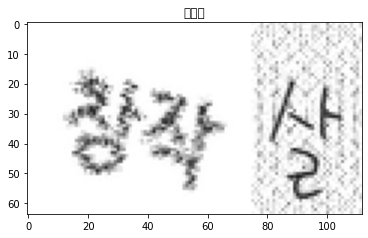

In [57]:
select1, select2 = random.choice(df['img_path']), random.choice(df['img_path'])
label1, label2 = df[df['img_path'] == select1]['label'].item(), df[df['img_path'] == select2]['label'].item()
    

# 이미지 읽기
img1 = cv2.imread(select1, 1);
img2 = cv2.imread(select2, 1);
    
addh = cv2.hconcat([img1, img2])
plt.imshow(addh)
plt.title(label1 + label2)

위 plot 그림처럼 Cutmix로 새로운 이미지를 생성해서 파일에 저장하고, 데이터프레임에 추가

In [58]:
idx = 100000
img_original = df['img_path']

for i in tqdm(range(50000)):
    select1, select2 = random.choice(img_original), random.choice(img_original)
    len1, len2 = df[df['img_path'] == select1]['len'].item(), df[df['img_path'] == select2]['len'].item()
    label1, label2 = df[df['img_path'] == select1]['label'].item(), df[df['img_path'] == select2]['label'].item()
    
    if len1 + len2 > 6:
        continue
        
    if len2count[len1 + len2] > 30000:
        continue
    
    # 이미지 읽기
    img1 = cv2.imread(select1, 1);
    img2 = cv2.imread(select2, 1);
    
    addh = cv2.hconcat([img1, img2])
    
    new_data = {
        'img_path' : f"images/image_{idx:06d}.png",
        'label' : label1 + label2,
        'len' : len1 + len2
    }
    
    df = df.append(new_data, ignore_index=True)
    cv2.imwrite(f"images/image_{idx:06d}.png", addh)
    idx += 1
    len2count[len1 + len2] += 1
    

100%|█████████████████████████████████████████████████████████████████████████| 100000/100000 [1:11:22<00:00, 23.35it/s]


In [61]:
df = df.drop(['len'], axis=1)

In [63]:
df.to_csv('./gt.txt', sep='\t', encoding='utf-8-sig', index=False, header=None)

## STRaug

In [1]:
import pandas as pd
from PIL import Image
import os
from tqdm import tqdm

from straug.noise import GaussianNoise
# from straug.blur import GaussianBlur  
# GaussianBlur는 코드 에러로 직접 Class 정의해서 실행
from straug.camera import Contrast, Brightness, Pixelate

In [ ]:
# 파일 불러오기
df = pd.read_csv("/home/cuai5th/CUAI_2022/KWAKsumin/OCR/data_transformed/train_aug/gt.txt", sep='\t', header=None)
df.columns = ['img_path', 'label']

In [ ]:
여기부터 코드 만져야함

In [4]:
df_no = df.sample(n=8000)
df_no_index = df_no.index.to_list()
df = df.drop(df_no_index)

df_br = df.sample(n=8000)
df_br_index = df_br.index.to_list()
df = df.drop(df_br_index)

df_bl = df.sample(n=8000)
df_bl_index = df_bl.index.to_list()
df = df.drop(df_bl_index)

df_co = df.sample(n=8000)
df_co_index = df_co.index.to_list()
df = df.drop(df_co_index)

df_pi = df.sample(n=8000)
df_pi_index = df_pi.index.to_list()
df = df.drop(df_pi_index)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42944 entries, 2 to 82943
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   img_path  42944 non-null  object
 1   label     42944 non-null  object
dtypes: object(2)
memory usage: 1006.5+ KB


In [5]:
# 인덱스 초기화
df = df.reset_index(drop=True)
df

,img_path,label
0,images/image_013852.png,떪
1,images/image_011511.png,삼
2,images/image_033794.png,넥타이
3,images/image_064495.png,뚝
4,images/image_020766.png,끎
...,...,...
42939,images/image_124610.png,홍보흔적
42940,images/image_124611.png,통야채
42941,images/image_124613.png,까먹다대다
42942,images/image_124614.png,조금씩낮다


# GaussianNoise

In [7]:
for i in tqdm(range(len(df_no))):
    
    # 파일 불러오기
    img = Image.open('/home/cuai5th/CUAI_2022/KWAKsumin/OCR/data_transformed_final/train/' + df_no['img_path'].iloc[i])
    
    # augmentation
    img = GaussianNoise()(img) 
    
    # 파일 저장. 파일명 숫자 200000 ~ 208000-1
    file_name = 'image_' + str(i + 200000) + '.png'
    img.save('/home/cuai5th/CUAI_2022/KWAKsumin/OCR/data_transformed_final/train1.5/images/' + file_name, 'png')
    
    # df에 추가
    file_path = 'images/' + file_name
    df.loc[len(df) + 1] = [file_path, df_no.iloc[i][1]]

100%|██████████████████████████████████████████████████████████████████████████████| 8000/8000 [00:56<00:00, 140.80it/s]


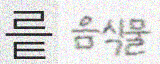

In [8]:
Image.open('/home/cuai5th/CUAI_2022/KWAKsumin/OCR/data_transformed_final/train1.5/images/image_207999.png')

# Contrast

In [9]:
for i in tqdm(range(len(df_co))):
    
    # 파일 불러오기
    img = Image.open('/home/cuai5th/CUAI_2022/KWAKsumin/OCR/data_transformed_final/train/' + df_co['img_path'].iloc[i])
    
    # augmentation
    img = Contrast()(img, mag=0)  # mag=0일때 가장 덜 적용됨
    
    # 파일 저장. 파일명 숫자 208000 ~ 216000-1
    file_name = 'image_' + str(i + 208000) + '.png'
    img.save('/home/cuai5th/CUAI_2022/KWAKsumin/OCR/data_transformed_final/train1.5/images/' + file_name, 'png')
    
    # df에 추가
    file_path = 'images/' + file_name
    df.loc[len(df) + 1] = [file_path, df_co.iloc[i][1]]

100%|██████████████████████████████████████████████████████████████████████████████| 8000/8000 [01:04<00:00, 123.34it/s]


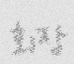

In [11]:
Image.open('/home/cuai5th/CUAI_2022/KWAKsumin/OCR/data_transformed_final/train1.5/images/image_215999.png')

# Brightness

In [12]:
for i in tqdm(range(len(df_br))):
    
    # 파일 불러오기
    img = Image.open('/home/cuai5th/CUAI_2022/KWAKsumin/OCR/data_transformed_final/train/' + df_br['img_path'].iloc[i])
    
    # augmentation
    img = Brightness()(img, mag=1) 
    
    # 파일 저장. 파일명 숫자 216000 ~ 224000-1
    file_name = 'image_' + str(i + 216000) + '.png'
    img.save('/home/cuai5th/CUAI_2022/KWAKsumin/OCR/data_transformed_final/train1.5/images/' + file_name, 'png')
    
    # df에 추가
    file_path = 'images/' + file_name
    df.loc[len(df) + 1] = [file_path, df_br.iloc[i][1]]

100%|███████████████████████████████████████████████████████████████████████████████| 8000/8000 [01:33<00:00, 85.37it/s]


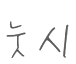

In [13]:
Image.open('/home/cuai5th/CUAI_2022/KWAKsumin/OCR/data_transformed_final/train1.5/images/image_223999.png')

# Pixelate

In [14]:
for i in tqdm(range(len(df_pi))):
    
    # 파일 불러오기
    img = Image.open('/home/cuai5th/CUAI_2022/KWAKsumin/OCR/data_transformed_final/train/' + df_pi['img_path'].iloc[i])
    
    # augmentation
    img = Pixelate()(img) 
    
    # 파일 저장. 파일명 숫자 224000 ~ 232000-1
    file_name = 'image_' + str(i + 224000) + '.png'
    img.save('/home/cuai5th/CUAI_2022/KWAKsumin/OCR/data_transformed_final/train1.5/images/' + file_name, 'png')
    
    # df에 추가
    file_path = 'images/' + file_name
    df.loc[len(df) + 1] = [file_path, df_pi.iloc[i][1]]

100%|██████████████████████████████████████████████████████████████████████████████| 8000/8000 [01:02<00:00, 127.92it/s]


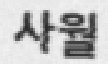

In [18]:
Image.open('/home/cuai5th/CUAI_2022/KWAKsumin/OCR/data_transformed_final/train1.5/images/image_230002.png')

# GaussianBlur

In [19]:
import cv2
import numpy as np
import torchvision.transforms as transforms
from PIL import Image, ImageOps
from skimage.filters import gaussian

class GaussianBlur:
    def __init__(self, rng=None):
        self.rng = np.random.default_rng() if rng is None else rng

    def __call__(self, img, mag=-1, prob=1.):
        if self.rng.uniform(0, 1) > prob:
            return img

        w, h = img.size
        # kernel = [(31,31)] prev 1 level only
        ksize = int(min(w, h) / 2) // 4
        ksize = (ksize * 2) + 1
        kernel = (ksize, ksize)
        sigmas = [.5, 1, 2]
        if mag < 0 or mag >= len(sigmas):
            index = self.rng.integers(0, len(sigmas))
        else:
            index = mag

        sigma = sigmas[index]
        return transforms.GaussianBlur(kernel_size=kernel, sigma=sigma)(img)

In [20]:
for i in tqdm(range(len(df_bl))):
    
    # 파일 불러오기
    img = Image.open('/home/cuai5th/CUAI_2022/KWAKsumin/OCR/data_transformed_final/train/' + df_bl['img_path'].iloc[i])
    
    # augmentation
    img = GaussianBlur()(img) 
    
    # 파일 저장. 파일명 숫자 232000 ~ 240000-1
    file_name = 'image_' + str(i + 232000) + '.png'
    img.save('/home/cuai5th/CUAI_2022/KWAKsumin/OCR/data_transformed_final/train1.5/images/' + file_name, 'png')
    
    # df에 추가
    file_path = 'images/' + file_name
    df.loc[len(df) + 1] = [file_path, df_bl.iloc[i][1]]

100%|███████████████████████████████████████████████████████████████████████████████| 8000/8000 [06:30<00:00, 20.48it/s]


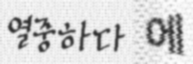

In [21]:
Image.open('/home/cuai5th/CUAI_2022/KWAKsumin/OCR/data_transformed_final/train1.5/images/image_239999.png')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82944 entries, 0 to 82944
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   img_path  82944 non-null  object
 1   label     82944 non-null  object
dtypes: object(2)
memory usage: 1.9+ MB


In [26]:
# df 모두 합치기
df = pd.concat([df, df_no, df_br, df_bl, df_co, df_pi])
df

,img_path,label
0,images/image_013852.png,떪
1,images/image_011511.png,삼
2,images/image_033794.png,넥타이
3,images/image_064495.png,뚝
4,images/image_020766.png,끎
...,...,...
51403,images/image_032529.png,멂
38448,images/image_025587.png,음성
30853,images/image_059961.png,가다
7987,images/image_058863.png,뜰


In [27]:
# 순서 섞기
df = df.sample(frac=1).reset_index(drop=True)
df

,img_path,label
0,images/image_235370.png,그이
1,images/image_071246.png,퇴직금
2,images/image_044349.png,느낌
3,images/image_022792.png,향상
4,images/image_062869.png,생
...,...,...
122939,images/image_106916.png,차뜻하다
122940,images/image_030653.png,서서히
122941,images/image_122567.png,책임자고모부
122942,images/image_102778.png,활발히덮이다


In [28]:
# df를 text 파일로 저장
df.to_csv('gt15.txt',header=None,index=False,sep='\t') ## 구분자를 탭으로 하여 저장. 인덱스칼럼은 저장 안함.

In [31]:
%cd /home/cuai5th/CUAI_2022/KWAKsumin/OCR

/home/cuai5th/CUAI_2022/KWAKsumin/OCR


In [32]:
!python3 deep/create_lmdb_dataset.py \
        --inputPath data_transformed_final/train1.5 \
        --gtFile data_transformed_final/train1.5/gt.txt \
        --outputPath deep/data_ocr/training_1.5/kordata

Written 1000 / 122944
Written 2000 / 122944
Written 3000 / 122944
Written 4000 / 122944
Written 5000 / 122944
Written 6000 / 122944
Written 7000 / 122944
Written 8000 / 122944
Written 9000 / 122944
Written 10000 / 122944
Written 11000 / 122944
Written 12000 / 122944
Written 13000 / 122944
Written 14000 / 122944
Written 15000 / 122944
Written 16000 / 122944
Written 17000 / 122944
Written 18000 / 122944
Written 19000 / 122944
Written 20000 / 122944
Written 21000 / 122944
Written 22000 / 122944
Written 23000 / 122944
Written 24000 / 122944
Written 25000 / 122944
Written 26000 / 122944
Written 27000 / 122944
Written 28000 / 122944
Written 29000 / 122944
Written 30000 / 122944
Written 31000 / 122944
Written 32000 / 122944
Written 33000 / 122944
Written 34000 / 122944
Written 35000 / 122944
Written 36000 / 122944
Written 37000 / 122944
Written 38000 / 122944
Written 39000 / 122944
Written 40000 / 122944
Written 41000 / 122944
Written 42000 / 122944
Written 43000 / 122944
Written 44000 / 1229

In [34]:
!python3 deep/create_lmdb_dataset.py \
        --inputPath data_transformed_final/valid \
        --gtFile data_transformed_final/valid/gt.txt \
        --outputPath deep/data_ocr/valid_aug/kordata

Written 1000 / 18560
Written 2000 / 18560
Written 3000 / 18560
Written 4000 / 18560
Written 5000 / 18560
Written 6000 / 18560
Written 7000 / 18560
Written 8000 / 18560
Written 9000 / 18560
Written 10000 / 18560
Written 11000 / 18560
Written 12000 / 18560
Written 13000 / 18560
Written 14000 / 18560
Written 15000 / 18560
Written 16000 / 18560
Written 17000 / 18560
Written 18000 / 18560
Created dataset with 18560 samples
